In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt


In [2]:
def exponential_growth(t, y, k):
    """
    dy/dt = k * y
    
    Parameters:
    t: time (independent variable)
    y: current value of dependent variable
    k: growth rate parameter
    """
    return k * y

In [ ]:
# Parameters
k = 0.5  # growth rate
y0 = 1.0  # initial condition
t_span = (0, 5)  # time interval
t_eval = np.linspace(0, 5, 100)  # evaluation points

# Solve using scipy.integrate.solve_ivp 
#solve_ivp pararmeters description:
#fun: callable  
#t_span: 2-tuple of floats
#y0: array_like
#t_eval: array_like, optional
solution = solve_ivp(exponential_growth, t_span, [y0], t_eval=t_eval, args=(k,))

# Extract results
t = solution.t
y = solution.y[0]

# Analytical solution for comparison
y_analytical = y0 * np.exp(k * t)

#Print Comparison of Analytical and Numerical Solutions
for ti, yi, ya in zip(t[::10], y[::10], y_analytical[::10]):
    print(f"t={ti:.2f}, Numerical={yi:.4f}, Analytical={ya:.4f}")   

t=0.00, Numerical=1.0000, Analytical=1.0000
t=0.51, Numerical=1.2873, Analytical=1.2873
t=1.01, Numerical=1.6571, Analytical=1.6571
t=1.52, Numerical=2.1332, Analytical=2.1331
t=2.02, Numerical=2.7460, Analytical=2.7459
t=2.53, Numerical=3.5342, Analytical=3.5347
t=3.03, Numerical=4.5497, Analytical=4.5501
t=3.54, Numerical=5.8573, Analytical=5.8572
t=4.04, Numerical=7.5401, Analytical=7.5398
t=4.55, Numerical=9.7059, Analytical=9.7058


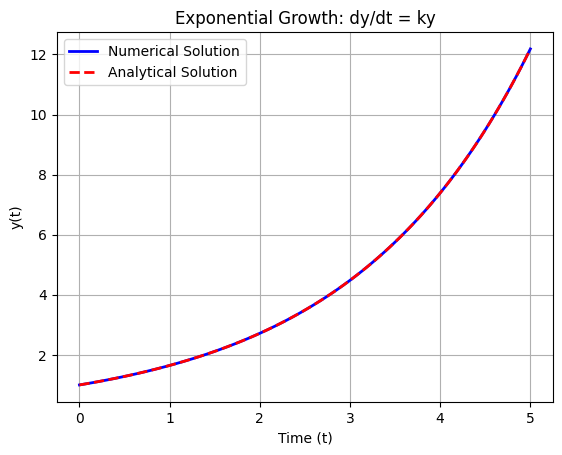

Final value (numerical): 12.182832
Final value (analytical): 12.182494
Error: 3.38e-04


In [4]:
plt.plot(t, y, 'b-', label='Numerical Solution', linewidth=2)
plt.plot(t, y_analytical, 'r--', label='Analytical Solution', linewidth=2)
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Exponential Growth: dy/dt = ky')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final value (numerical): {y[-1]:.6f}")
print(f"Final value (analytical): {y_analytical[-1]:.6f}")
print(f"Error: {abs(y[-1] - y_analytical[-1]):.2e}")